In [1]:
import secrets

In [2]:
import psycopg2

In [4]:
params = secrets.aws()

In [72]:
conn = psycopg2.connect(**params)

In [69]:
cur = conn.cursor()

In [7]:
cur.execute('SELECT version()')

In [8]:
db_version = cur.fetchone()

In [9]:
print(db_version)

('PostgreSQL 12.6 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',)


In [10]:
cur.close()

In [73]:
cur = conn.cursor()

In [74]:
cur.execute('SELECT dt, main_temp, main_feels_like, main_pressure, main_humidity, wind_speed, wind_deg FROM weather_station;')

In [75]:
data = cur.fetchall()

In [76]:
data

[(datetime.datetime(2021, 4, 20, 9, 15, 1),
  303.15,
  308.19,
  1010,
  70,
  4.12,
  130.0),
 (datetime.datetime(2021, 4, 20, 9, 15, 1),
  303.15,
  308.19,
  1010,
  70,
  4.12,
  130.0),
 (datetime.datetime(2021, 4, 20, 9, 25, 2),
  303.15,
  308.19,
  1010,
  70,
  4.63,
  150.0),
 (datetime.datetime(2021, 4, 20, 9, 25, 2),
  303.15,
  308.19,
  1010,
  70,
  4.63,
  150.0),
 (datetime.datetime(2021, 4, 20, 9, 25, 2),
  303.15,
  308.19,
  1010,
  70,
  4.63,
  150.0),
 (datetime.datetime(2021, 4, 20, 9, 40, 2),
  303.15,
  308.19,
  1010,
  70,
  4.63,
  150.0),
 (datetime.datetime(2021, 4, 20, 9, 40, 2),
  303.15,
  308.19,
  1010,
  70,
  4.63,
  150.0),
 (datetime.datetime(2021, 4, 20, 9, 40, 2),
  303.15,
  308.19,
  1010,
  70,
  4.63,
  150.0),
 (datetime.datetime(2021, 4, 20, 9, 55, 1),
  302.15,
  305.88,
  1010,
  70,
  4.12,
  130.0),
 (datetime.datetime(2021, 4, 20, 9, 55, 1),
  302.15,
  305.88,
  1010,
  70,
  4.12,
  130.0),
 (datetime.datetime(2021, 4, 20, 10, 5, 

In [77]:
cur.close()

In [78]:
type(data)

list

In [24]:
import pandas as pd

In [79]:
df = pd.DataFrame(data)

In [80]:
df

,0,1,2,3,4,5,6
0,2021-04-20 09:15:01,303.15,308.19,1010,70,4.12,130.0
1,2021-04-20 09:15:01,303.15,308.19,1010,70,4.12,130.0
2,2021-04-20 09:25:02,303.15,308.19,1010,70,4.63,150.0
3,2021-04-20 09:25:02,303.15,308.19,1010,70,4.63,150.0
4,2021-04-20 09:25:02,303.15,308.19,1010,70,4.63,150.0
...,...,...,...,...,...,...,...
275,2021-04-21 08:10:02,303.15,308.19,1009,70,6.17,160.0
276,2021-04-21 08:10:02,303.15,308.19,1009,70,6.17,160.0
277,2021-04-21 08:10:02,303.15,308.19,1009,70,6.17,160.0
278,2021-04-21 08:25:01,303.15,308.19,1010,70,6.69,150.0


In [29]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [82]:
df.columns = ['dt', 'temp', 'feels like', 'pressure', 'humidity', 'wind speed', 'deg']

In [83]:
df

,dt,temp,feels like,pressure,humidity,wind speed,deg
0,2021-04-20 09:15:01,303.15,308.19,1010,70,4.12,130.0
1,2021-04-20 09:15:01,303.15,308.19,1010,70,4.12,130.0
2,2021-04-20 09:25:02,303.15,308.19,1010,70,4.63,150.0
3,2021-04-20 09:25:02,303.15,308.19,1010,70,4.63,150.0
4,2021-04-20 09:25:02,303.15,308.19,1010,70,4.63,150.0
...,...,...,...,...,...,...,...
275,2021-04-21 08:10:02,303.15,308.19,1009,70,6.17,160.0
276,2021-04-21 08:10:02,303.15,308.19,1009,70,6.17,160.0
277,2021-04-21 08:10:02,303.15,308.19,1009,70,6.17,160.0
278,2021-04-21 08:25:01,303.15,308.19,1010,70,6.69,150.0


In [84]:
df.drop_duplicates(subset='dt', keep='first', inplace=True)

In [85]:
df['temp'] -= 273.15

In [86]:
df['feels like'] -= 273.15

In [87]:
df

,dt,temp,feels like,pressure,humidity,wind speed,deg
0,2021-04-20 09:15:01,30.0,35.04,1010,70,4.12,130.0
2,2021-04-20 09:25:02,30.0,35.04,1010,70,4.63,150.0
5,2021-04-20 09:40:02,30.0,35.04,1010,70,4.63,150.0
8,2021-04-20 09:55:01,29.0,32.73,1010,70,4.12,130.0
10,2021-04-20 10:05:02,29.0,32.73,1010,70,4.12,130.0
...,...,...,...,...,...,...,...
266,2021-04-21 07:25:01,30.0,34.10,1010,66,6.17,150.0
269,2021-04-21 07:40:01,30.0,34.10,1010,66,6.17,150.0
272,2021-04-21 07:55:02,30.0,35.04,1009,70,6.17,160.0
275,2021-04-21 08:10:02,30.0,35.04,1009,70,6.17,160.0


In [88]:
df['feels like'].max()

35.04000000000002

In [89]:
df['feels like'].min()

25.590000000000032

In [90]:
df['temp'].min()

25.0

In [91]:
df['dt']

0     2021-04-20 09:15:01
2     2021-04-20 09:25:02
5     2021-04-20 09:40:02
8     2021-04-20 09:55:01
10    2021-04-20 10:05:02
              ...        
266   2021-04-21 07:25:01
269   2021-04-21 07:40:01
272   2021-04-21 07:55:02
275   2021-04-21 08:10:02
278   2021-04-21 08:25:01
Name: dt, Length: 105, dtype: datetime64[ns]

In [97]:
hourly_mean = df.groupby(df['dt'].dt.hour).mean()

In [98]:
hourly_mean

,temp,feels like,pressure,humidity,wind speed,deg
dt,,,,,,
0,27.00,28.7350,1012.25,73.75,1.9300,7.5
1,28.80,32.2920,1013.00,69.80,1.6440,218.0
2,29.00,32.7300,1013.00,70.00,2.1600,110.0
3,29.00,32.9200,1012.75,71.00,2.4425,225.0
4,29.80,34.7300,1011.80,70.80,3.2920,252.0
5,30.00,34.8050,1011.00,69.00,2.9575,225.0
6,30.00,34.2880,1010.20,66.80,4.5240,158.0
7,30.00,34.5700,1009.75,68.00,6.0425,155.0
8,30.00,35.0400,1009.50,70.00,6.4300,155.0


<AxesSubplot:xlabel='dt'>

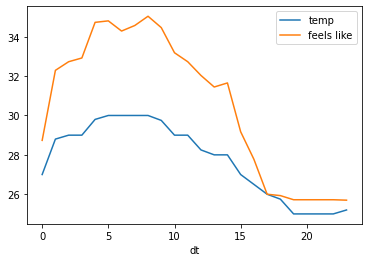

In [99]:
hourly_mean.plot.line(y = ['temp', 'feels like'])

In [102]:
from matplotlib.pyplot import polar

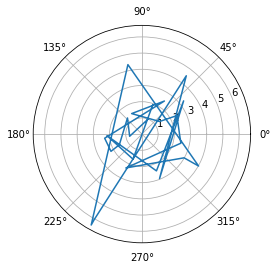

In [113]:
polar(hourly_mean['deg'], hourly_mean['wind speed'])

In [117]:
hourly_mean['temp'].tolist()

[27.0,
 28.8,
 29.0,
 29.0,
 29.8,
 30.0,
 30.0,
 30.0,
 30.0,
 29.75,
 29.0,
 29.0,
 28.25,
 28.0,
 28.0,
 27.0,
 26.5,
 26.0,
 25.75,
 25.0,
 25.0,
 25.0,
 25.0,
 25.2]